### 주어진 타이타닉 데이터를 확인하고 결측치가 있는 컬럼을 전처리 진행 하시오
- 결측 삭제
- 결측 대체
- 위 두가지 방법을 활용하여 각 컬럼의 결측을 처리하고 진행 한 이유를 간단히 설명하시오.

In [18]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

In [19]:
titanic_df = pd.read_csv('./titanic_train.csv', encoding = 'cp949')

In [20]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic_df.shape

(891, 12)

#### 컬럼별 결측 확인

In [22]:
titanic_df.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 결과를 보면 cabin, age 에서 결측치가 나타난다.
####  결측이 있는 컬럼을 처리
- 먼저 결측치가 나타난 Age 값은 상대적으로 승객 data에서 승객을 구별하는데 있어서 우선순위가 밀린다고 생각하였고
    - Age 열을 삭제해주었다.
    - Cabin 은 객실 번호로 승객들이 배의 ticket 을 구매했고 직접적으로 승객들을 확인할 수 있는 data 라 생각, NaN 값과 이웃하는 값이 같은 객실이라고 판단하고 결측치를 객실없음으로 대체했다.

In [23]:
# age 열의 삭제
titanic_df.drop('Age', axis = 1, inplace = True)
titanic_df.shape

(891, 11)

In [24]:
titanic_df.isnull().sum(axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
titanic_df = titanic_df.fillna('No_cabin')

In [26]:
titanic_df.isnull().sum(axis = 0)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### 주어진 타이타닉 데이터를 확인하고 이상치가 있는 컬럼을 전처리 진행하시오

- 이상치를 각 컬럼에서 찾아내고

    - 이상치가 하나라도 있는 레코드를 삭제

- 최종 학습데이터의 수를 확인

<function matplotlib.pyplot.show(close=None, block=None)>

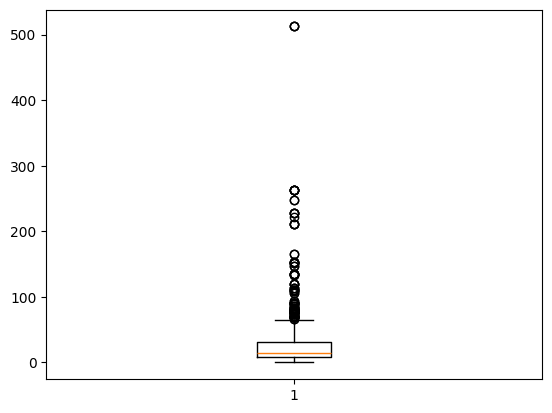

In [27]:
fig, ax = plt.subplots()
ax.boxplot(titanic_df['Fare'])
plt.show

{'whiskers': [<matplotlib.lines.Line2D at 0x24743ee2470>,
 'caps': [<matplotlib.lines.Line2D at 0x24743ee29b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24743ee21d0>],
 'medians': [<matplotlib.lines.Line2D at 0x24743e1af20>],
 'fliers': [<matplotlib.lines.Line2D at 0x24743ee2bc0>],
 'means': []}

<function matplotlib.pyplot.show(close=None, block=None)>

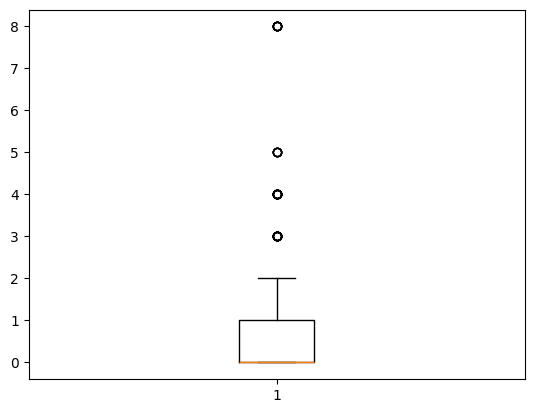

In [61]:
fig, ax = plt.subplots()
ax.boxplot(titanic_df['SibSp'])
plt.show   

In [29]:
## IQR_rule을 계산하는 함수를 생성해서 사용

# val_list로는 컬럼값을 전달(열벡터)
def IQR_rule(val_list):
    # IQR 계산
    Q1 = np.quantile(val_list, 0.25)
    Q3 = np.quantile(val_list, 0.75)
    IQR = Q3 - Q1

    # IQR rule의 위배여부를 표현하는 bool list 를 계산해서 반환
    # 이상치의 조건 :  Q3 + 1.5 * IQR 초과하거나 Q1 - 1.5 * IQR 미만이거나
    # Q3 + 1.5 * IQR > val_list / Q3 + 1.5 * IQR <= val_list 는 val_list가 상위 이상치 이하면 True,
    # Q1 - 1.5 * IQR < val_list / Q1 - 1.5 * IQR >= val_list는 vla_list가 하위 이상치 이상이면 True
    not_out_cond =  (Q3 + 1.5 * IQR > val_list) & (Q1 - 1.5 * IQR < val_list)
    
    # Q1, Q3, IQR 값은 저장해야 함
    return not_out_cond

In [30]:
tmp = IQR_rule(titanic_df['Fare'])
tmp

0       True
1      False
2       True
3       True
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Fare, Length: 891, dtype: bool

In [31]:
not_out_cond = IQR_rule(titanic_df['Fare'])
filtered_data = titanic_df[not_out_cond]
cleaned_titanic_df = pd.DataFrame(filtered_data)

In [32]:
not_out_cond = IQR_rule(titanic_df['SibSp'])
filtered_data = titanic_df[not_out_cond]
cleaned_titanic_df = pd.DataFrame(filtered_data)

In [33]:
cleaned_titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 845 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  845 non-null    int64  
 1   Survived     845 non-null    int64  
 2   Pclass       845 non-null    int64  
 3   Name         845 non-null    object 
 4   Sex          845 non-null    object 
 5   SibSp        845 non-null    int64  
 6   Parch        845 non-null    int64  
 7   Ticket       845 non-null    object 
 8   Fare         845 non-null    float64
 9   Cabin        845 non-null    object 
 10  Embarked     845 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 79.2+ KB


In [34]:
cleaned_titanic_df.shape

(845, 11)

### 주어진 타이타닉 데이터를 확인하고 왜도가 있는 컬럼을 전처리 
- 수치 데이터인 Fare, SibSp 에 왜도가 있을 것이라고 판단, 전처리를 실행하였다.

In [35]:
skewed_column = 'Fare'

In [36]:
cleaned_titanic_df[skewed_column] = stats.boxcox(cleaned_titanic_df[skewed_column] + 1)[0]

In [37]:
skewed_column = 'SibSp'

In [38]:
cleaned_titanic_df[skewed_column] = stats.boxcox(cleaned_titanic_df[skewed_column] + 1)[0]

In [39]:
cleaned_titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,0.234034,0,A/5 21171,1.887947,No_cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.234034,0,PC 17599,3.430760,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0.000000,0,STON/O2. 3101282,1.950363,No_cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.234034,0,113803,3.245006,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0.000000,0,373450,1.961346,No_cabin,S


In [40]:
cleaned_titanic_df.shape

(845, 11)